**Función:** evalua resultado del experimento 1.

**Requiere:**
- ../../datasets/X_test_DATASET10K224_x_float.pkl
- ../../datasets/y_test_DATASET10K224.pkl
- ./modelos/tf_model_\<run_id\>

**Crea:**


In [ ]:
ejecutadoEnGoogleDrive = False # True si se ejecuta en Google Drive

In [ ]:
import tensorflow as tf
import pickle
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
if ejecutadoEnGoogleDrive:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH = '/content/drive/clasificacion_imagenes/4_Modelacion/Experimento_1/
    ruta_datasets = '/content/drive/clasificacion_imagenes/datasets/'
else:
    PATH = './'
    ruta_datasets = '../..//datasets/'

%cd {PATH}

Mounted at /content/drive


In [ ]:
X_test = pickle.load(open(ruta_datasets + 'X_test_DATASET10K224_x_float.pkl','rb'))
y_test = pickle.load(open(ruta_datasets + 'y_test_DATASET10K224.pkl','rb'))

In [ ]:
# las métricas han sido quitadas de Keras en 2.0
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
modelo = tf.keras.models.load_model(PATH + 'modelos/tf_model_2eb65387888c4bde8a458c9fc544bbb2', custom_objects={'f1_m':f1_m,
                                                                                                                'recall_m' : recall_m,
                                                                                                                'precision_m' : precision_m})

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      4330      
                                                                 
 activation_6 (Activation)   (None, 224, 224, 10)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 224)     20384     
                                                                 
 activation_7 (Activation)   (None, 222, 222, 224)     0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 224)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 55, 55, 224)       0         
                                                      

In [ ]:
modelo.evaluate(x=X_test, y=y_test)

52/52 [==============================] - 77s 1s/step - loss: 0.3471 - acc: 0.9116 - f1_m: 0.9109 - precision_m: 0.9162 - recall_m: 0.9059


[0.3471164107322693,
 0.911552369594574,
 0.910916268825531,
 0.9162396192550659,
 0.9059295058250427]

In [ ]:
y_pred = modelo.predict(X_test)

52/52 [==============================] - 80s 1s/step


In [ ]:
y_pred

array([[9.9999827e-01, 4.4845640e-07, 1.1802369e-06, 1.4377851e-08,
        2.1832136e-08],
       [9.9999982e-01, 5.7896983e-08, 6.1430804e-08, 2.6158268e-11,
        6.0442135e-10],
       [9.9555993e-01, 6.5705506e-04, 3.7751999e-03, 7.6382858e-06,
        2.0843085e-07],
       ...,
       [2.4619941e-03, 4.2241598e-03, 3.2440275e-05, 2.4995855e-03,
        9.9078184e-01],
       [2.9207086e-02, 7.7163681e-02, 2.5713649e-02, 4.6140794e-03,
        8.6330158e-01],
       [2.5161844e-01, 1.2787803e-01, 1.3615528e-02, 7.9475485e-02,
        5.2741253e-01]], dtype=float32)

In [ ]:
categories = ['food', 'inside', 'outside', 'drink', 'menu']

In [ ]:
y_pred_2 = pd.DataFrame(np.argmax(y_pred, axis=1), columns=['label'])

In [ ]:
y_pred_labels = y_pred_2.label.apply(lambda x: categories[x])

In [ ]:
y_test_2 = pd.DataFrame(np.argmax(y_test, axis=1), columns=['label'])

In [ ]:
y_test_labels = y_test_2.label.apply(lambda x: categories[x])

In [ ]:
confusion_matrix(y_test_labels, y_pred_labels, labels=['food', 'inside', 'outside', 'drink', 'menu'])

array([[930,  23,   4,   0,   0],
       [ 30, 389,   2,   8,   1],
       [ 35,  15,  83,   1,   1],
       [  5,  17,   2,  98,   0],
       [  1,   1,   1,   0,  15]])

In [ ]:
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)

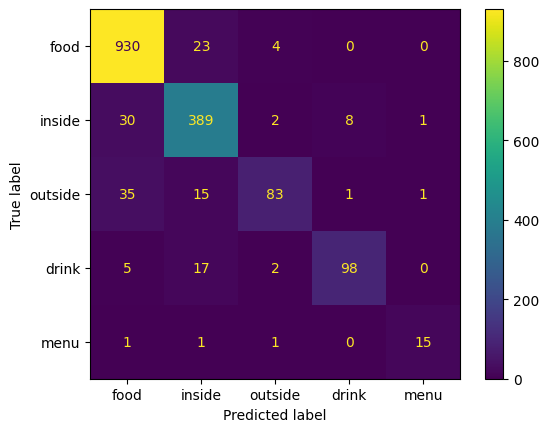

In [ ]:
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score

In [ ]:
print(classification_report(y_test_labels, y_pred_labels, digits=3))

              precision    recall  f1-score   support

       drink      0.916     0.803     0.856       122
        food      0.929     0.972     0.950       957
      inside      0.874     0.905     0.889       430
        menu      0.882     0.833     0.857        18
     outside      0.902     0.615     0.731       135

    accuracy                          0.912      1662
   macro avg      0.901     0.826     0.857      1662
weighted avg      0.911     0.912     0.909      1662



In [ ]:
# To deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
print(balanced_accuracy_score(y_test_labels, y_pred_labels))

0.8255729666638472
